# Soil Fertility Prediction

In [1]:
import pandas as pd

In [2]:
soil = pd.read_csv("data.csv")

In [3]:
soil.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
soil['N'].value_counts()

40     44
22     44
27     42
39     41
31     41
       ..
127     2
130     1
46      1
135     1
139     1
Name: N, Length: 137, dtype: int64

In [6]:
soil['P'].value_counts()

60    56
58    48
56    46
55    44
57    42
      ..
90     2
82     2
83     2
93     1
84     1
Name: P, Length: 117, dtype: int64

In [7]:
soil['K'].value_counts()

17    90
22    87
15    86
20    80
25    78
      ..
84     8
82     8
13     7
7      5
80     4
Name: K, Length: 73, dtype: int64

In [8]:
soil['temperature'].value_counts()

28.484449    1
28.880789    1
22.770356    1
28.569735    1
38.201682    1
            ..
27.912210    1
27.923744    1
29.628007    1
25.467437    1
26.736908    1
Name: temperature, Length: 2200, dtype: int64

In [9]:
soil['humidity'].value_counts()

34.133078    1
90.598103    1
24.253862    1
92.254799    1
93.724851    1
            ..
95.487634    1
89.732667    1
90.038631    1
92.914873    1
90.035771    1
Name: humidity, Length: 2200, dtype: int64

In [10]:
soil['ph'].value_counts()

5.940547    1
6.376757    1
5.561511    1
7.533509    1
6.484800    1
           ..
7.319952    1
5.978634    1
6.927918    1
8.914075    1
5.542690    1
Name: ph, Length: 2200, dtype: int64

In [11]:
soil['rainfall'].value_counts()

162.593126    1
53.124429     1
103.923226    1
40.810630     1
39.238310     1
             ..
74.520820     1
150.201214    1
156.361617    1
185.946143    1
197.643971    1
Name: rainfall, Length: 2200, dtype: int64

In [12]:
soil.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
##%matplotlib inline

In [14]:
##import matplotlib.pylot as plt
##soil.hist(bins=50 , figsize=(20 , 15))

# Train-Test Split

In [15]:
import numpy as np
def split_train_test(data  , test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_index = shuffled[:test_set_size]
    train_index = shuffled[test_set_size:]
    return data.iloc[train_index] , data.iloc[test_index]

In [16]:
train_set , test_set = split_train_test(soil , 0.2)

In [17]:
print(f"Rows in Train Set : {len(train_set)}\nRows in Test Set : {len(test_set)}\n")

Rows in Train Set : 1760
Rows in Test Set : 440



# Train-Test Split Using SckitLearn


In [18]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(soil , test_size=0.2 , random_state=42)
print(f"Rows in Train Set : {len(train_set)}\nRows in Test Set : {len(test_set)}\n")

Rows in Train Set : 1760
Rows in Test Set : 440



# Correlations
Detecting the protionality

In [19]:
corr_matrix = soil.corr()

In [20]:
corr_matrix['N'].sort_values(ascending=False)

N              1.000000
humidity       0.190688
ph             0.096683
rainfall       0.059020
temperature    0.026504
K             -0.140512
P             -0.231460
Name: N, dtype: float64

In [21]:
corr_matrix['P'].sort_values(ascending=False)

P              1.000000
K              0.736232
rainfall      -0.063839
humidity      -0.118734
temperature   -0.127541
ph            -0.138019
N             -0.231460
Name: P, dtype: float64

In [22]:
corr_matrix['K'].sort_values(ascending=False)

K              1.000000
P              0.736232
humidity       0.190859
rainfall      -0.053461
N             -0.140512
temperature   -0.160387
ph            -0.169503
Name: K, dtype: float64

In [23]:
corr_matrix['humidity'].sort_values(ascending=False)

humidity       1.000000
temperature    0.205320
K              0.190859
N              0.190688
rainfall       0.094423
ph            -0.008483
P             -0.118734
Name: humidity, dtype: float64

In [24]:
corr_matrix['temperature'].sort_values(ascending=False)

temperature    1.000000
humidity       0.205320
N              0.026504
ph            -0.017795
rainfall      -0.030084
P             -0.127541
K             -0.160387
Name: temperature, dtype: float64

In [25]:
corr_matrix['ph'].sort_values(ascending=False)

ph             1.000000
N              0.096683
humidity      -0.008483
temperature   -0.017795
rainfall      -0.109069
P             -0.138019
K             -0.169503
Name: ph, dtype: float64

In [26]:
corr_matrix['rainfall'].sort_values(ascending=False)

rainfall       1.000000
humidity       0.094423
N              0.059020
temperature   -0.030084
K             -0.053461
P             -0.063839
ph            -0.109069
Name: rainfall, dtype: float64

array([[<AxesSubplot:xlabel='N', ylabel='N'>,
        <AxesSubplot:xlabel='K', ylabel='N'>,
        <AxesSubplot:xlabel='P', ylabel='N'>,
        <AxesSubplot:xlabel='ph', ylabel='N'>,
        <AxesSubplot:xlabel='temperature', ylabel='N'>,
        <AxesSubplot:xlabel='humidity', ylabel='N'>,
        <AxesSubplot:xlabel='rainfall', ylabel='N'>],
       [<AxesSubplot:xlabel='N', ylabel='K'>,
        <AxesSubplot:xlabel='K', ylabel='K'>,
        <AxesSubplot:xlabel='P', ylabel='K'>,
        <AxesSubplot:xlabel='ph', ylabel='K'>,
        <AxesSubplot:xlabel='temperature', ylabel='K'>,
        <AxesSubplot:xlabel='humidity', ylabel='K'>,
        <AxesSubplot:xlabel='rainfall', ylabel='K'>],
       [<AxesSubplot:xlabel='N', ylabel='P'>,
        <AxesSubplot:xlabel='K', ylabel='P'>,
        <AxesSubplot:xlabel='P', ylabel='P'>,
        <AxesSubplot:xlabel='ph', ylabel='P'>,
        <AxesSubplot:xlabel='temperature', ylabel='P'>,
        <AxesSubplot:xlabel='humidity', ylabel='P'>,
        <A

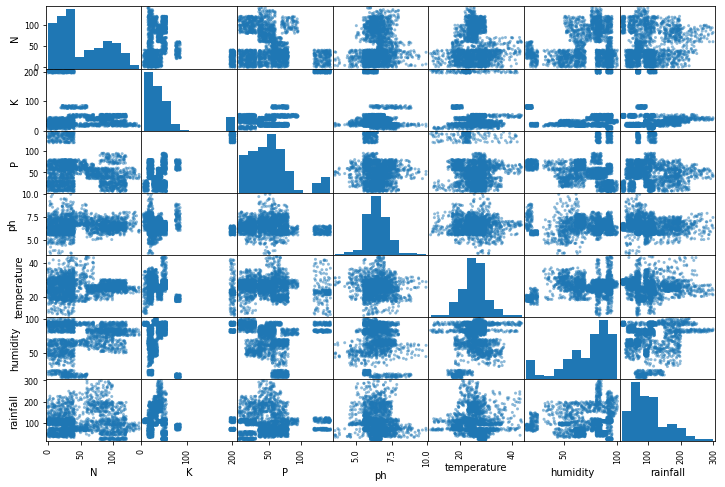

In [29]:
from pandas.plotting import scatter_matrix
attribute = ["N" , "K" , "P" , "ph" , "temperature" , "humidity" , "rainfall"]
scatter_matrix(soil[attribute], figsize = (12,8))

In [5]:
model = []
accuracy = []

In [2]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2, random_state=42)

NameError: name 'train_test_split' is not defined